In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/PS_20174392719_1491204439457_log.csv")
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)
df.dropna(inplace=True)


In [30]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [31]:
df.info()
df.describe()
df.isnull().sum()  # Check for missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 436.9+ MB


step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [32]:
print("Unique Transaction Types:", df['type'].unique())
print(df['type'].value_counts())


Unique Transaction Types: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


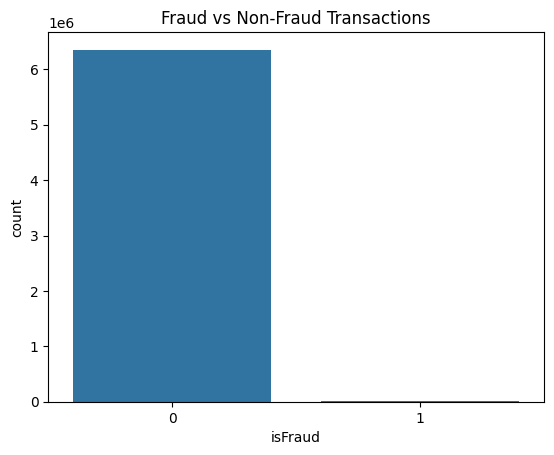

In [33]:
sns.countplot(data=df, x='isFraud')
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()


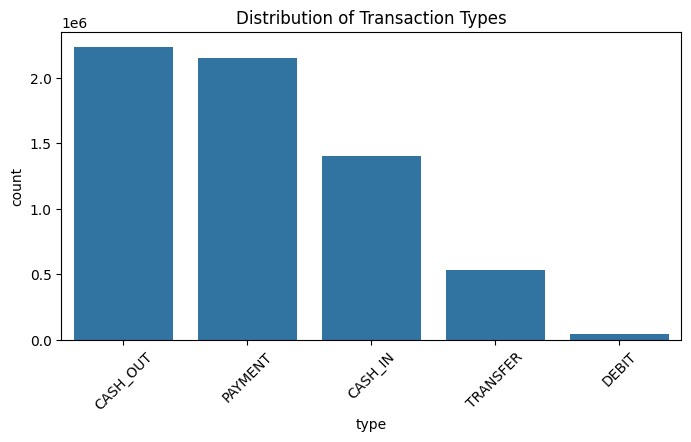

In [34]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title("Distribution of Transaction Types")
plt.xticks(rotation=45)
plt.show()


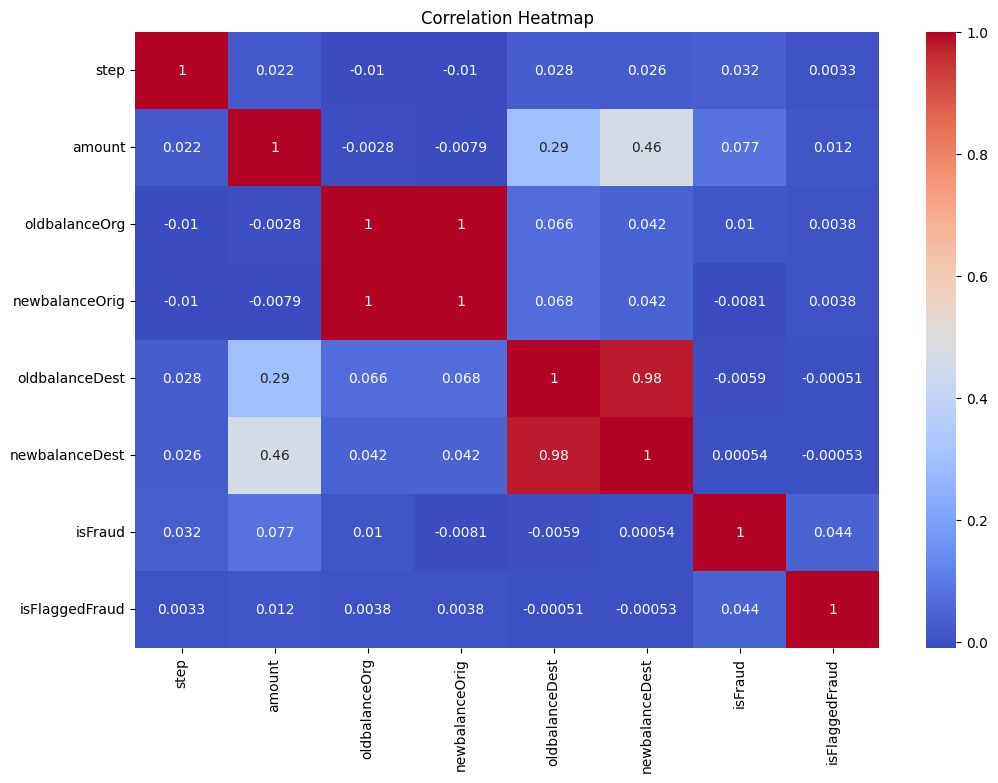

In [35]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


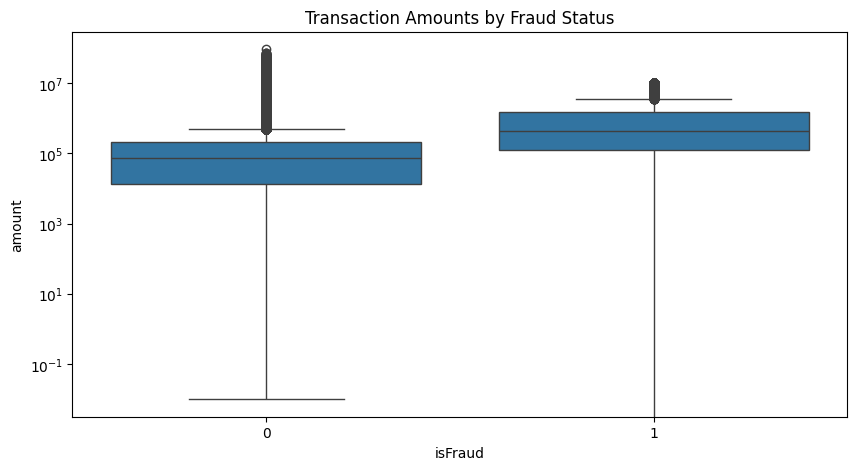

In [36]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.yscale('log')  # Amount has high range
plt.title('Transaction Amounts by Fraud Status')
plt.show()


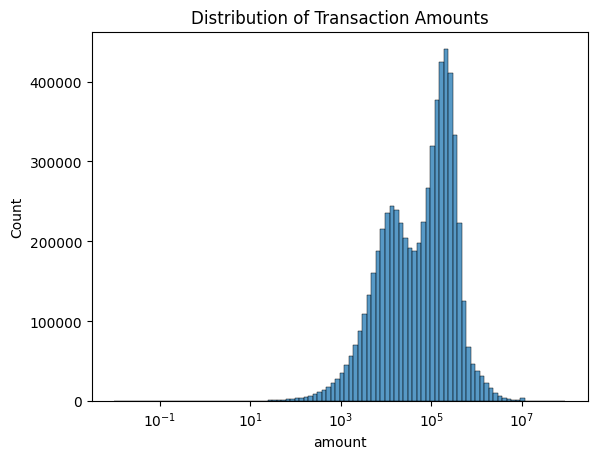

In [37]:
sns.histplot(df['amount'], bins=100, log_scale=True)
plt.title('Distribution of Transaction Amounts')
plt.show()


In [38]:
df.duplicated().sum()  # Number of duplicate rows
df.columns  # Check column names to see if anything like 'nameOrig' or 'nameDest' is useless


Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

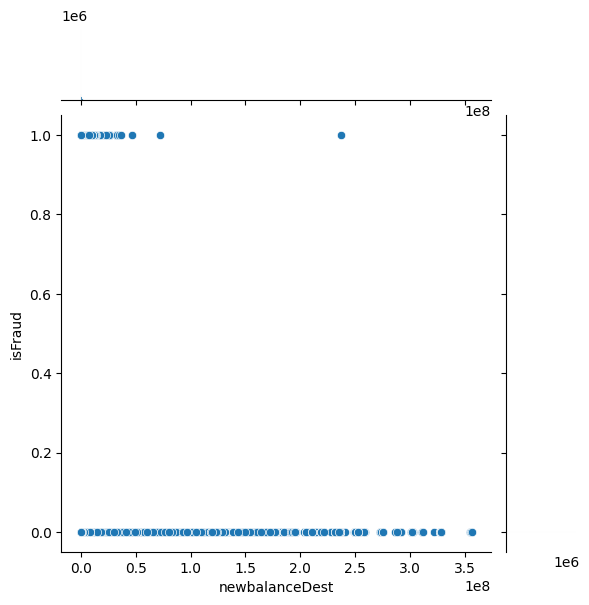

In [39]:
sns.jointplot(data=df,x='newbalanceDest',y='isFraud')

<Axes: xlabel='type', ylabel='count'>

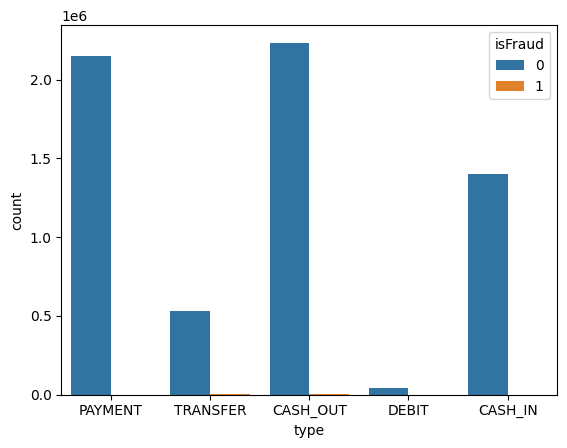

In [40]:
sns.countplot(data=df,x='type',hue='isFraud')

<Axes: xlabel='isFraud', ylabel='step'>

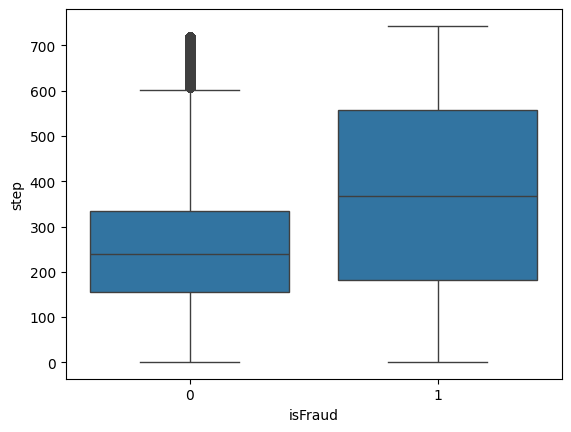

In [41]:
sns.boxplot(data=df,x='isFraud',y='step')

<Axes: xlabel='isFraud', ylabel='amount'>

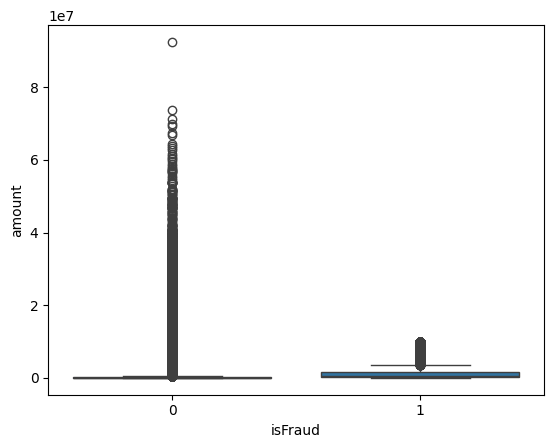

In [42]:
sns.boxplot(data=df,x='isFraud',y='amount')

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

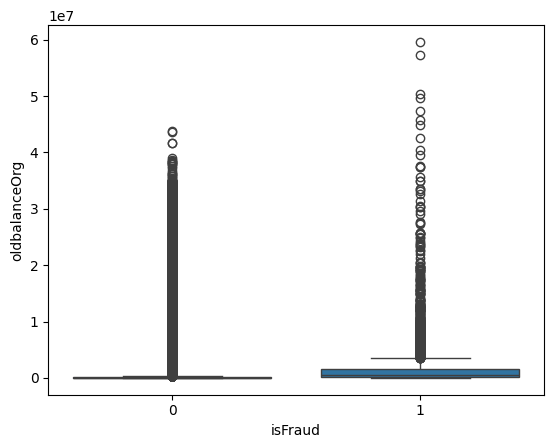

In [43]:
sns.boxplot(data=df,x='isFraud',y='oldbalanceOrg')

<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

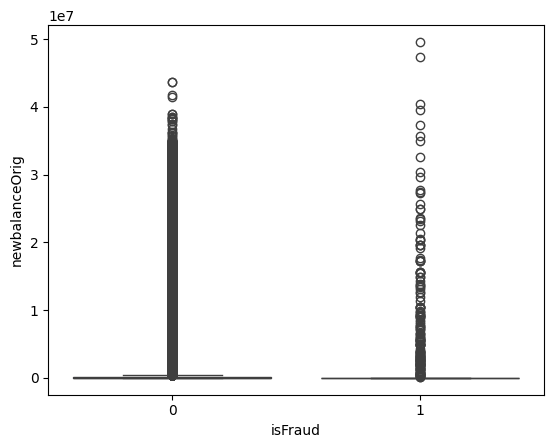

In [44]:
sns.boxplot(data=df,x='isFraud',y='newbalanceOrig')

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

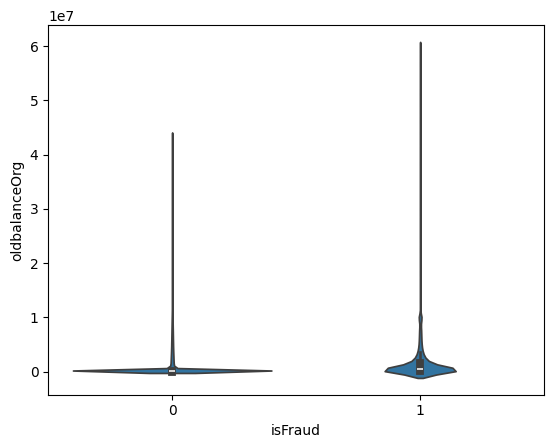

In [45]:
sns.violinplot(data=df,x='isFraud',y='oldbalanceOrg')

<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

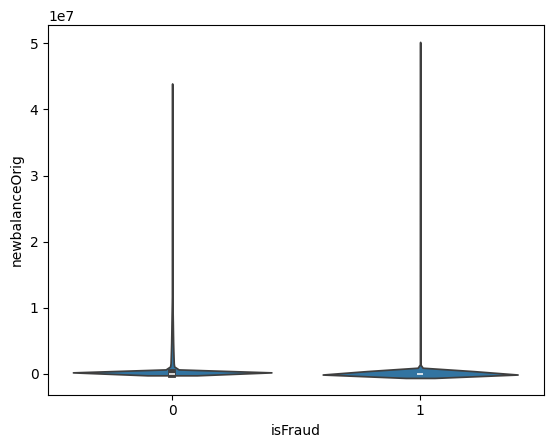

In [46]:
sns.violinplot(data=df,x='isFraud',y='newbalanceOrig')

In [47]:
df.describe(include='all')

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


In [48]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

X = df.drop('isFraud', axis=1)
y = df['isFraud']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [49]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_test_predict1 = rfc.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict1)
print("Test Accuracy (Random Forest):", test_accuracy)

y_train_predict1 = rfc.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict1)
print("Train Accuracy (Random Forest):", train_accuracy)

print(pd.crosstab(y_test, y_test_predict1))
print(classification_report(y_test, y_test_predict1))
print(confusion_matrix(y_test,y_test_predict1))

Test Accuracy (Random Forest): 0.9996956180525214
Train Accuracy (Random Forest): 0.9999995509486882
col_0          0     1
isFraud               
0        1906307    44
1            537  1898
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.98      0.78      0.87      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786

[[1906307      44]
 [    537    1898]]


In [50]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_test_predict2 = dtc.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict2)
print("Test Accuracy (Decision Tree):", test_accuracy)

y_train_predict2 = dtc.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict2)
print("Train Accuracy (Decision Tree):", train_accuracy)

print(pd.crosstab(y_test, y_test_predict2))
print(classification_report(y_test, y_test_predict2))
print(confusion_matrix(y_test,y_test_predict2))

Test Accuracy (Decision Tree): 0.9997092392756443
Train Accuracy (Decision Tree): 1.0
col_0          0     1
isFraud               
0        1906100   251
1            304  2131
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.89      0.88      0.88      2435

    accuracy                           1.00   1908786
   macro avg       0.95      0.94      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786

[[1906100     251]
 [    304    2131]]


In [51]:
# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)

y_test_predict3 = etc.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict3)
print("Test Accuracy (Extra Trees):", test_accuracy)

y_train_predict3 = etc.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict3)
print("Train Accuracy (Extra Trees):", train_accuracy)

print(pd.crosstab(y_test, y_test_predict3))
print(classification_report(y_test, y_test_predict3))
print(confusion_matrix(y_test,y_test_predict3))

Test Accuracy (Extra Trees): 0.999676234004231
Train Accuracy (Extra Trees): 1.0
col_0          0     1
isFraud               
0        1906329    22
1            596  1839
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.99      0.76      0.86      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.88      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786

[[1906329      22]
 [    596    1839]]


In [52]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

svc = LinearSVC(max_iter=10000)  # Increase iterations if needed
svc.fit(x_train, y_train)

y_test_predict4 = svc.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict4)
print("Test Accuracy (LinearSVC):", test_accuracy)

y_train_predict4 = svc.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict4)
print("Train Accuracy (LinearSVC):", train_accuracy)

print(pd.crosstab(y_test, y_test_predict4))
print(classification_report(y_test, y_test_predict4))
print(confusion_matrix(y_test,y_test_predict4))

Test Accuracy (LinearSVC): 0.9976660558071989
Train Accuracy (LinearSVC): 0.997616211111595
col_0          0     1
isFraud               
0        1903462  2889
1           1566   869
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.23      0.36      0.28      2435

    accuracy                           1.00   1908786
   macro avg       0.62      0.68      0.64   1908786
weighted avg       1.00      1.00      1.00   1908786

[[1903462    2889]
 [   1566     869]]


In [53]:
import xgboost as xgb

xgb1 = xgb.XGBClassifier()
xgb1.fit(x_train, y_train)

y_test_predict5 = xgb1.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict5)
print("Test Accuracy (XGBoost):", test_accuracy)

y_train_predict5 = xgb1.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict5)
print("Train Accuracy (XGBoost):", train_accuracy)

print(pd.crosstab(y_test, y_test_predict5))
print(classification_report(y_test, y_test_predict5))
print(confusion_matrix(y_test,y_test_predict5))


Test Accuracy (XGBoost): 0.9996940463729302
Train Accuracy (XGBoost): 0.9997696366770742
col_0          0     1
isFraud               
0        1906202   149
1            435  2000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.93      0.82      0.87      2435

    accuracy                           1.00   1908786
   macro avg       0.97      0.91      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786

[[1906202     149]
 [    435    2000]]


In [54]:
# Compare Models
from sklearn.metrics import accuracy_score

def compareModel():
    print("Train accuracy for rfc:", accuracy_score(y_train_predict1,y_train,))
    print("Test accuracy for rfc:", accuracy_score(y_test_predict1,y_test))
    print("Train accuracy for dtc:", accuracy_score(y_train_predict2,y_train,))
    print("Test accuracy for dtc:", accuracy_score(y_test_predict2,y_test))
    print("Train accuracy for etc:", accuracy_score(y_train_predict3,y_train,))
    print("Test accuracy for etc:", accuracy_score(y_test_predict3,y_test))
    print("Train accuracy for svc:", accuracy_score(y_train_predict4,y_train))
    print("Test accuracy for svc:", accuracy_score(y_test_predict4,y_test))
    print("Train accuracy for xgb:", accuracy_score(y_train_predict5,y_train))
    print("Test accuracy for xgb:", accuracy_score(y_test_predict5,y_test))

compareModel()


Train accuracy for rfc: 0.9999995509486882
Test accuracy for rfc: 0.9996956180525214
Train accuracy for dtc: 1.0
Test accuracy for dtc: 0.9997092392756443
Train accuracy for etc: 1.0
Test accuracy for etc: 0.999676234004231
Train accuracy for svc: 0.997616211111595
Test accuracy for svc: 0.9976660558071989
Train accuracy for xgb: 0.9997696366770742
Test accuracy for xgb: 0.9996940463729302


In [55]:
import pickle
from sklearn.metrics import accuracy_score

# Assume predictions and model objects are already available
results = {
    "RandomForest": accuracy_score(y_test, y_test_predict1),
    "DecisionTree": accuracy_score(y_test, y_test_predict2),
    "ExtraTrees": accuracy_score(y_test, y_test_predict3),
    "SVM": accuracy_score(y_test, y_test_predict4),
    "XGBoost": accuracy_score(y_test, y_test_predict5)
}

models = {
    "RandomForest": rfc,
    "DecisionTree": dtc,
    "ExtraTrees": etc,
    "SVM": svc,
    "XGBoost": xgb1
}

# Manual method to find the best model
best_model_name = None
best_accuracy = -1

for name, acc in results.items():
    if acc > best_accuracy:
        best_accuracy = acc
        best_model_name = name

best_model = models[best_model_name]

print(f"✅ Best Model: {best_model_name}")
print(f"📈 Accuracy: {best_accuracy}")

# Save best model to file
with open("payments.pkl", "wb") as f:
    pickle.dump(best_model, f)

✅ Best Model: DecisionTree
📈 Accuracy: 0.9997092392756443
